<h3>Проект создается с целью изучить российский рынок кинематографа и отследить тенденции, закономерности и предпочтения зрителей на основе имеющихся данных.
     Изучить данные о господдержке и как она влияет на популярность.</h3>

План проекта:
- Проведем предобработку данных, подготовим данные для анализа
- Добавим столбцы с дополнительной информацией для исследований
- Проведем визуалное исследование, отобразив данные на графиках
- Подведем итоги на основе полученных данных.

## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
import pandas as pd # Импортируем пандас преобразовав в сокращенный вид
import numpy as np # Импорт таблиц для различных математических выражений и матриц
#import math
#import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns
try:
    data_1 = pd.read_csv('mkrf_movies.csv', sep=',') #Прочитаем датасет указав разделитель для данных датасета
    data_2 = pd.read_csv('mkrf_shows.csv', sep=',')
except:
    data_1 = pd.read_csv('mkrf_movies.csv', sep=',') #Прочитаем датасет из компьютера на случай не работы сервера указав разделитель для данных датасета
    data_2 = pd.read_csv('mkrf_shows.csv', sep=',')

In [3]:
data_2.info()#контроль соответствий типов данных
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 


In [4]:
data_1[~data_1['puNumber'].str.isdigit()] #возьмем функцию, которая найдет нецифровые значения, т.к. попытки преобразовать колонку в цифровую неудачны

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_1.loc[804, 'puNumber'] = data_1.loc[804, 'puNumber'].strip() #удалим пробелы в строке
data_1.loc[1797, 'puNumber'] = '0'                                # заменим пробел на ноль

data_1['puNumber'] = pd.to_numeric(data_1['puNumber'])            # изменим тип данных функцией
data_1['puNumber'].dtype                                          #проверим тип данных

dtype('int64')

In [6]:
data = data_1.merge(data_2, left_on='puNumber', right_on='puNumber', how='left')#объединяем таблицы по общей 'puNumber', методом объединения колючей, сохраняя данные в data
del data_2

<h6>Объединили две таблицы для проведения дальнейших расчетов</h6>

# Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [8]:
#data['puNumber'] = np.floor(pd.to_numeric(data['puNumber'], errors='coerce')).astype('Int64') #изменим тип данных в обход пропусков
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format = '%Y-%m-%d')#преобразуем дату, так как начало проката не предполагает время
#data['ratings'] = data['ratings'].astype('float64')#изменим тип данных
#ratings_med = data['ratings'].median()# замена медианным значением
#data['ratings'] = data['ratings'].fillna(ratings_med).astype('Float64')

In [9]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [10]:
invalid_raitings = data[data['ratings'].str.contains('[^0-9.]').fillna(False)] #Создадим переменную, в которую войдут строки с процентами
invalid_raitings

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00+00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06 12:00:00+00:00,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29 12:00:00+00:00,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00+00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1805,Спираль.,111001014,2014-01-30 12:00:00+00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1874,Короткие истории о любви 2,121002615,2015-02-13 12:00:00+00:00,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00+00:00,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2126,Поездка к матери,111002015,2015-03-02 12:00:00+00:00,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2146,Главный,111003415,2015-03-27 12:00:00+00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2438,Самый рыжий Лис,111012715,2015-07-30 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


- Переделаем проценты в десятые доли, переписав посимвольно элементы ячейки, добавив между ними точку и исключая знак процентов
- переведем данные столбца в числовой вид функцией to_numertic
- проверим диапазон значений

In [11]:
data.loc[invalid_raitings.index, 'ratings'] = invalid_raitings['ratings'].str[0] + '.' + invalid_raitings['ratings'].str[1] 

data['ratings'] = pd.to_numeric(data['ratings'])

data['ratings'].describe()[['min', 'max']]

min    1.0
max    9.9
Name: ratings, dtype: float64

<h6>Преобразовали дату в подходящий формат </h6>

#### Шаг 2.2. Изучим пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Количество пропусков по столбцам


title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

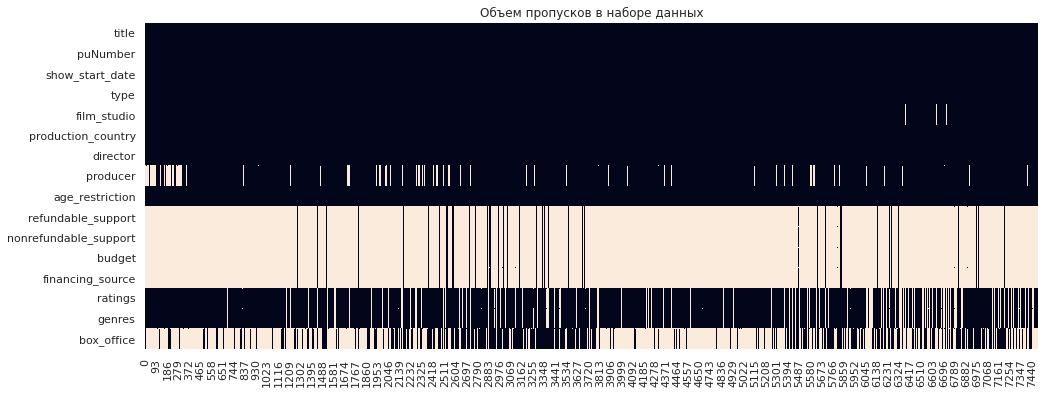

In [12]:
# Визуализируем данные через heatmap.


data_nans = data.isna()

sns.set(rc = {'figure.figsize':(16,6)})
sns.heatmap(data_nans.transpose(), cbar=False).set_title('Объем пропусков в наборе данных')

print('Количество пропусков по столбцам')
data_nans.sum()

In [13]:
data_nans['year'] = data['show_start_date'].dt.year


data_nans['total_records'] = True

data_nans.groupby(by='year').agg(sum).transpose()

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
title,0,0,0,0,0,0,0,0,0,0
puNumber,0,0,0,0,0,0,0,0,0,0
show_start_date,0,0,0,0,0,0,0,0,0,0
type,0,0,0,0,0,0,0,0,0,0
film_studio,1,0,0,0,1,0,0,0,12,4
production_country,1,0,0,0,0,0,1,0,0,0
director,5,2,1,1,0,0,0,0,0,0
producer,40,15,26,89,189,77,54,34,14,30
age_restriction,0,0,0,0,0,0,0,0,0,0
refundable_support,985,622,593,628,791,619,757,464,835,860


- На тепловой карте видно, что колонки финансирования имеют много пропусков. Можно предположить, что много фильмов снималось без поддержки

    - Замены производились в колонке рейтинг,т.к. эти данные будут нужны для дальнейших математических расчетов.
    - Замены в значениях с суммаи не производятся, так как это значения, замена которых может исказить данные.
    - Данные в категориальных колонках оставляем без изменений, потому, что никак не участуют в расчетах.

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [14]:
print('Количество дублирующихся строк:', data.duplicated().sum())

data.nunique()

Количество дублирующихся строк: 0


title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

In [15]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.0,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Дубликаты в title это прокат в разное время и разных кинотеатрах

In [16]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


- Не исключено, что один номер прокатного удостоверения  дает возможность  проката нескольких фильмов.

<h5>Шаг 2.4. Изучим категориальные значения Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах; Исправьте проблемные значения в поле type.</h5>

In [17]:
data['production_country'] = data['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))#Заменим знаки препинания в виде'-' на ','
data['production_country'].head(15)

0                          США
1                         СССР
2                          США
3                          США
4                          США
5                         СССР
6                         СССР
7                          США
8                      Франция
9                СССР, Венгрия
10                         США
11                        СССР
12                         США
13    Германия, Великобритания
14      Великобритания, Италия
Name: production_country, dtype: object

In [18]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США, Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...","США, Великобритания",Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN


In [19]:
data['type'].unique()
data['type'] = data['type'].str.strip()# убираем пробелы спереди и сзади ключа
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [20]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [21]:
display(data['financing_source'].unique())

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [22]:
data['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [23]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', ...,
       'Ник Пауэлл', 'А.Беляев', 'И.Трусов'], dtype=object)

In [24]:
data['producer'].unique()

array(['Дэвид Валдес, Кевин Костнер, Джейк Эбертс', nan,
       'Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит', ...,
       'Поппи Бегум, Ник Пойнц',
       'Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэт Саксон, Кирк Шоу',
       'Дженнифер Додж'], dtype=object)

In [25]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [26]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

<h6>Общая проблем, это пропуски, которые встречаются в каждом столбце</h6>

<h6>Дубли связанны с тем, что многие категории пересекаются по ряду параметров, например, жанр, место реализации, режисер, студия, страна производства</h6>

<h6>Доработано</h6>

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [27]:
non_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
non_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


<h6>Финансирование это важный компонент любой отрасли. Бюджет некоторых фильмов равен нулю, а средства выделены были. Можно рассмотреть гипотизу о том, что это неосознанный пропуск и заменить медианным значением колонок типа финанисирования по всему датасету.</h6>

Чаще всего доля участия государства в бюджете составляет 0.6140376284219444



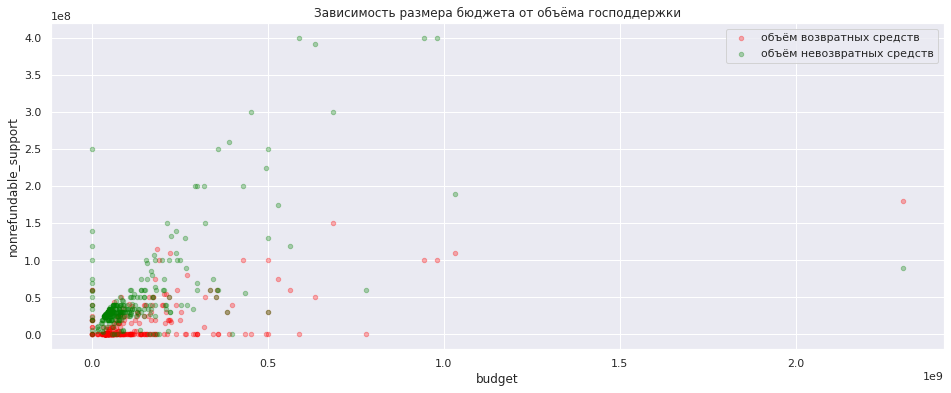

In [28]:
ax = data.plot.scatter(
    title='Зависимость размера бюджета от объёма господдержки',
    label='объём возвратных средств', #Маркировка разметки на графике
    x='budget',
    y='refundable_support',
    color='red',
    alpha=0.3
)

data.plot.scatter(
    label='объём невозвратных средств',
    x='budget', y='nonrefundable_support',
    color='green',
    alpha=0.3,
    ax=ax)

data['support_rel'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

support_rel = data['support_rel'].median()

print('Чаще всего доля участия государства в бюджете составляет', support_rel)
print()

In [29]:
data.loc[non_budget.index, 'budget'] = (data.loc[non_budget.index, 'refundable_support'] + data.loc[non_budget.index, 'nonrefundable_support'])

data.loc[non_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_rel
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,inf
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,4.461635e+08,inf
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,inf
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,inf
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,160000000.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,inf
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,59000000.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,inf
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,35000000.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,inf
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,6000000.0,Министерство культуры,4.3,комедия,1.536293e+07,inf
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,70000000.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,inf
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,250000000.0,Фонд кино,5.6,фантастика,1.038321e+09,inf


<h6>Исправлено</h6>

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [30]:
data['year'] = data['show_start_date'].dt.year.astype('Int64')#Акцентируемся на int64 для исключения дальнейших ошибок


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [31]:
def add_main(data, columns):  
    for column in columns:
        data[f'main_{column}'] = data[column].dropna().apply(lambda x: x.split(',')[0]) #создадим префикс для новой колонки, исключая пропуски столбца а так же используем первое слово[0] перед запятой для отображения
    return data

In [32]:
data = add_main(data, ['director', 'genres']) # определим колонки, к которым применим функцию

- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [33]:
print('Чаще всего доля участия государства в бюджете составляет', support_rel)

Чаще всего доля участия государства в бюджете составляет 0.6140376284219444



### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

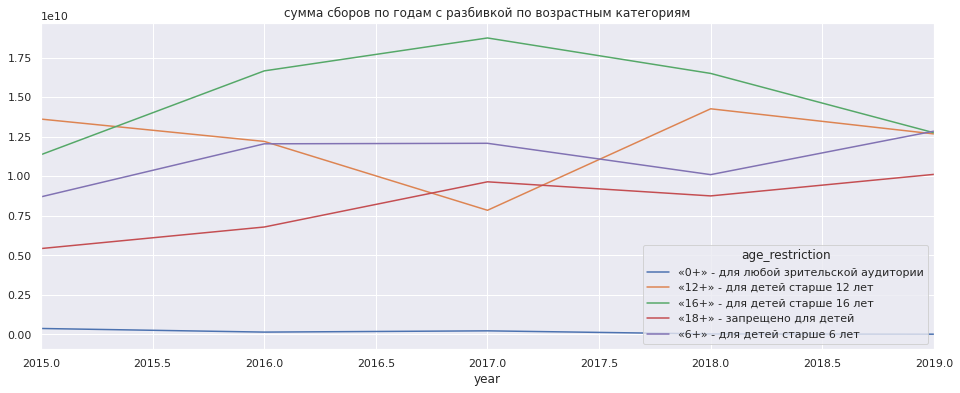

In [34]:
data[data['box_office'].notna()] \
    .pivot_table(index='year',
                columns='age_restriction',
                values='box_office',
                aggfunc='sum') \
    .plot(title='сумма сборов по годам с разбивкой по возрастным категориям', kind='line', xlim=[2015, 2019])
print()

<h6>Особо отличается категория 16+ Это интересный показатель для маркетологов, на основании которого можно провести дополнительное исследование.</h6>

In [35]:
#med_box= data['box_office'].median() #создадим переменную медианного значения сборов
#data['box_office'] = (data['box_office'].fillna(med_box)) #Заменим пропуски медианным значением
#print(data['box_office'].tail(3160))

In [36]:
data_pivot = data.loc[data['box_office'].notna(), ['year', 'box_office']] \
                .groupby('year') \
                .agg(['count', 'sum', 'mean', 'median'])

data_pivot.columns = data_pivot.columns.get_level_values(1)

Часть  фильмов, содержащих информацию о сборах: 0.42


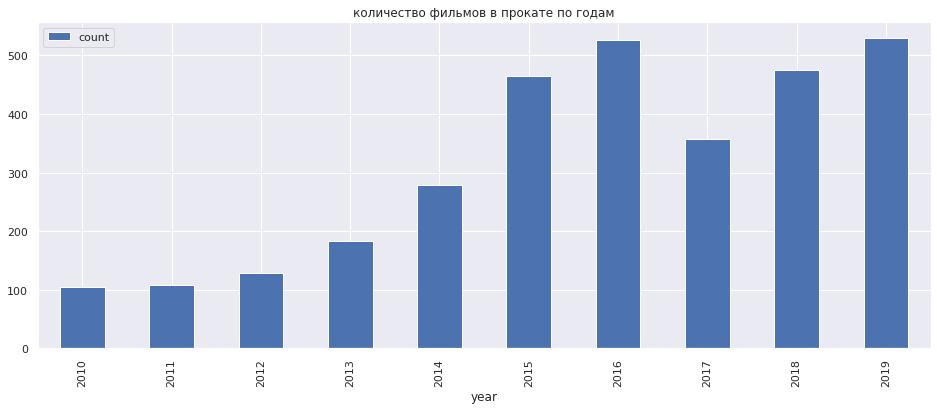

In [37]:
data_pivot.plot(title='количество фильмов в прокате по годам', kind='bar', y='count')
print(f'Часть  фильмов, содержащих информацию о сборах: {data.box_office.notna().mean():.2f}')

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

<h6>Максимальный всплеск активности был в 16 и 19о годах, причины остаются загадкой и требуют дополнительного исследования</h6>

В 2010 году сумма сборов была минимальной, в 2018 максимальной.


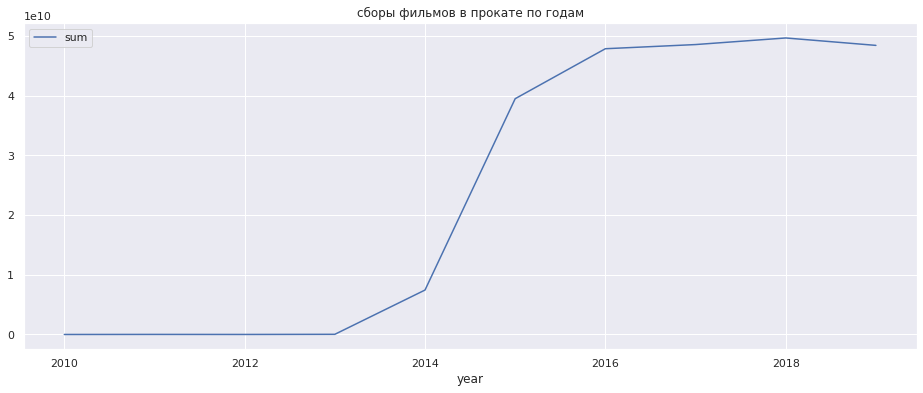

In [38]:
data_pivot.plot(title='сборы фильмов в прокате по годам', kind='line', y='sum')
print(f"В {data_pivot['sum'].idxmin()} году сумма сборов была минимальной, в {data_pivot['sum'].idxmax()} максимальной.")

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

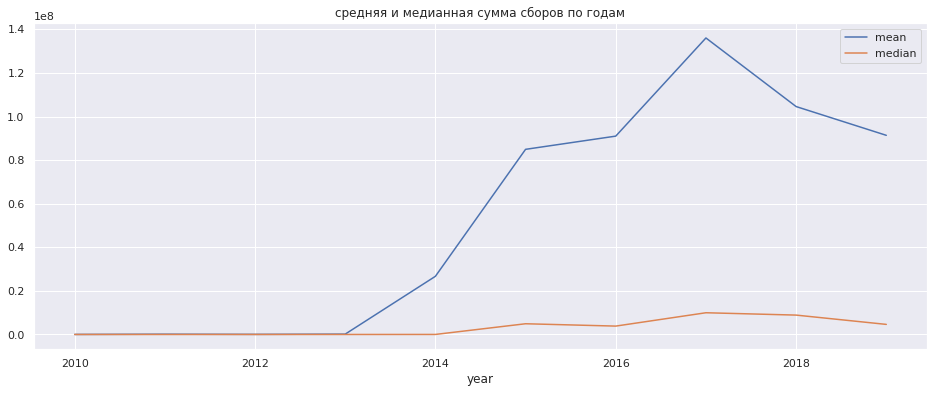

In [39]:
data_pivot.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['mean','median'])
print()

<h6>Медианная и средняя в некоторых местах отличается, это может быть свидетельством всплесков активности на некоторых временных промежутках</h6>

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [ ]:
data_supported = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]

data_supported['full_support'] = data_supported['nonrefundable_support'] + data_supported['refundable_support']

data_supported['profitability'] = data_supported['box_office'] / data_supported['full_support'] - 1

data_supported['is_paid_off'] = data_supported['profitability'] > 0

data_supported['is_not_paid_off'] = ~data_supported['is_paid_off']

<AxesSubplot:title={'center':'средняя оценка фильмов по жанрам'}, xlabel='main_genres'>

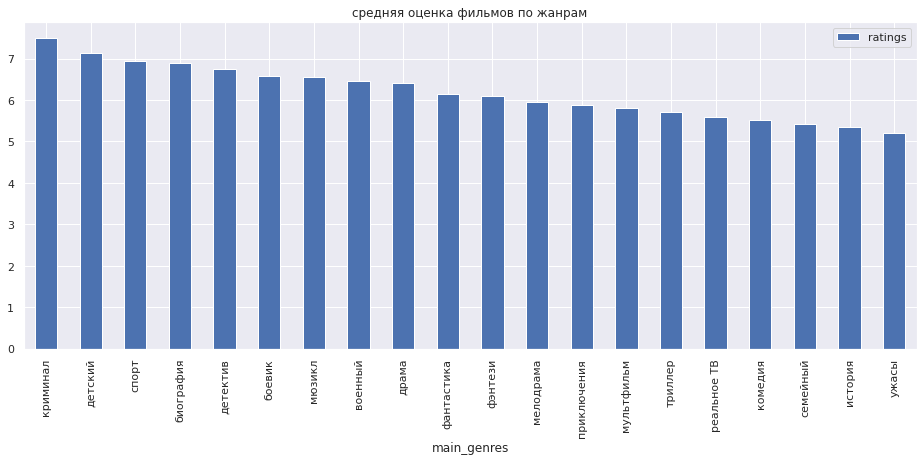

In [41]:
data_supported[['main_genres', 'ratings']].groupby('main_genres') \
                                        .agg('mean') \
                                        .sort_values(by='ratings', ascending=False) \
                                        .plot(title='средняя оценка фильмов по жанрам', kind='bar')

<AxesSubplot:title={'center':'количество фильмов, получивших господдержку (по жанрам)'}>

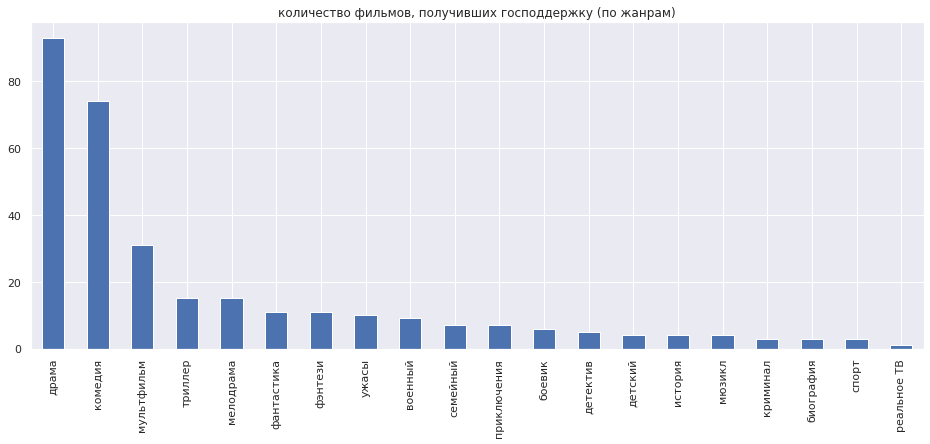

In [42]:
#data_supported['full_support'] = data_supported['nonrefundable_support'] + data_supported['refundable_support']
data_supported['main_genres'].value_counts().plot(title='количество фильмов, получивших господдержку (по жанрам)', kind='bar')

<h6>Топ 5 фильмов с господдержкой: 1.Драма 2.Комедия 3.Мультфильм 4.Триллер 5.Мелодрама</h6>

<AxesSubplot:title={'center':'количество окупившихся и не окупившихся фильмов'}, xlabel='main_genres'>

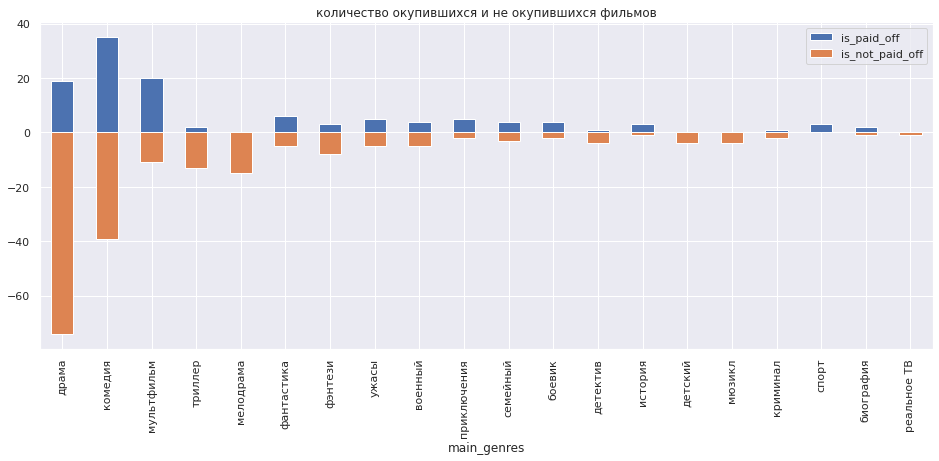

In [43]:
data_supported.groupby('main_genres') \
            .agg({'title': 'count',
                  'is_paid_off': 'sum',
                  'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title',
                         ascending=False) \
            .plot(title='количество окупившихся и не окупившихся фильмов',
                  kind='bar',
                  stacked=True,
                  y=['is_paid_off', 'is_not_paid_off'])

<h6>Наиболее окупаемы фильмы связанные со спортом, историей, боевики.</h6>

<AxesSubplot:title={'center':'объём государственной поддержки'}, xlabel='main_genres'>

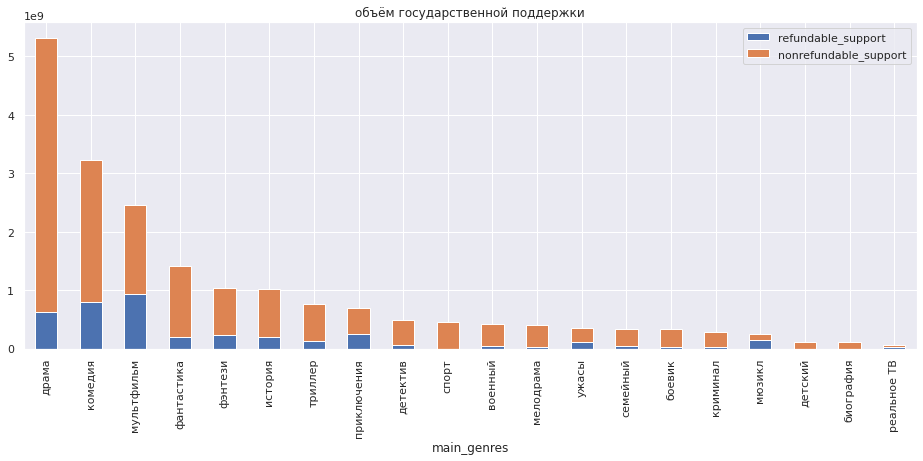

In [44]:
data_supported.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='объём государственной поддержки',
                  kind='bar',
                  stacked=True,
                  y=['refundable_support', 'nonrefundable_support'])

<AxesSubplot:title={'center':'общая рентабельность жанра'}, xlabel='main_genres'>

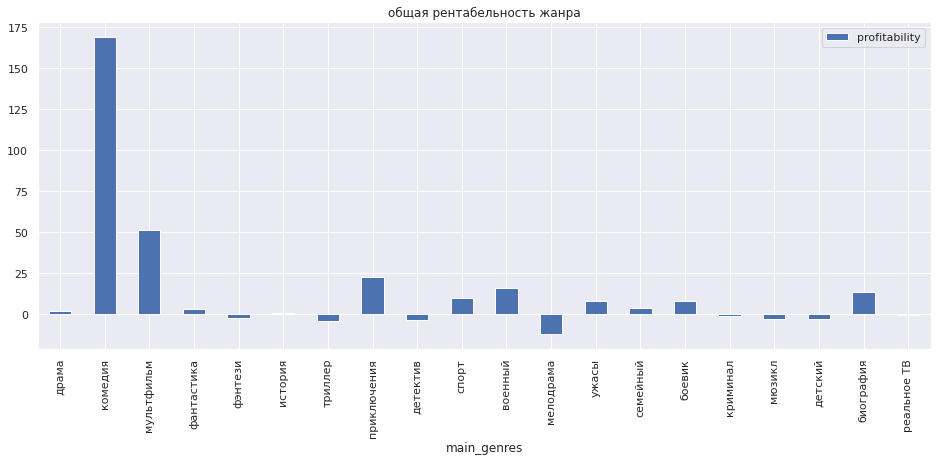

In [45]:
# profitability by genres
data_supported.groupby('main_genres') \
            .agg('sum') \
            .sort_values(by='full_support',
                         ascending=False) \
            .plot(title='общая рентабельность жанра',
                  kind='bar',
                  stacked=True,
                  y='profitability')

<h6>Общая рентабельность находится в экшен жанрах и биографии, а так же военные, комедийные и мультипликационные</h6>

<AxesSubplot:title={'center':'средняя рентабельность фильмов (по жанрам)'}, xlabel='main_genres'>

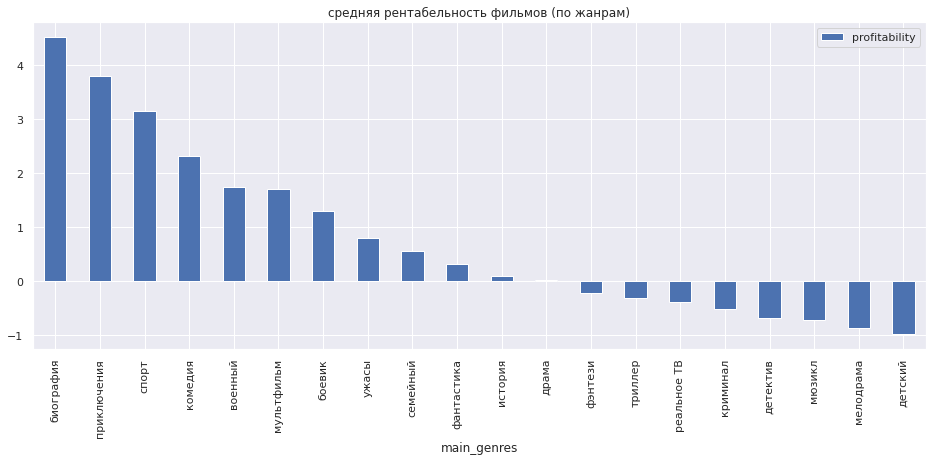

In [46]:
# profitability by genres
data_supported.groupby('main_genres') \
            .agg('mean') \
            .sort_values(by='profitability',
                         ascending=False) \
            .plot(title='средняя рентабельность фильмов (по жанрам)',
                  kind='bar',
                  stacked=True,
                  y='profitability')

<AxesSubplot:title={'center':'Эффективность режисеров относительно рентабельности своих фильмов'}, ylabel='main_director'>

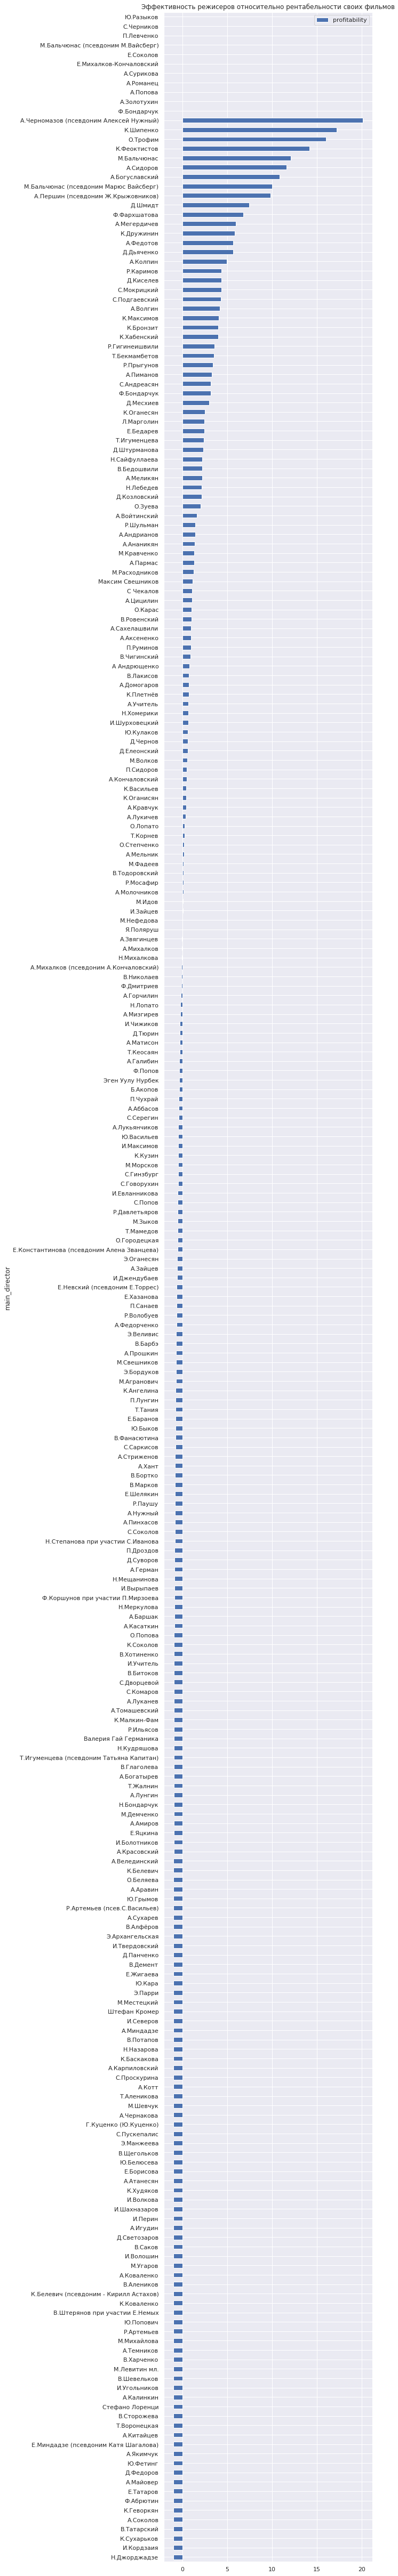

In [99]:
# profitability by genres
data_supported.groupby('main_director') \
            .agg('mean') \
            .sort_values(by='profitability',
                         ascending=True) \
            .plot(title='Эффективность режисеров относительно рентабельности своих фильмов',
                kind='barh', 
                figsize=(7,88),
                stacked=False,
                y='profitability')

### Шаг 5. Общий вывод

1.Если трактовать выделенные средства господдержки, как деньги, необходимые для продвижения того или иного жанра в массы, то в большенстве своем эти инвестиции являются неокупаемыми. Средняя рентабельность отражает полную картину по жанрам


2.Некоторые данные показывают отрицательную рентабельность. Другими словами это убыточное мероприятие, основной идеей которого не является получение прибыли. 
         
         
3.Наиболее окупаемыми оказались экшены и боевики, наиболее убыточными драммы и комедии.


4.Из данных можно сделать вывод, что кинопрокат как отрасль изжило себя. Этому достаточное количестов альтернатив, неудевительно.
         
         
5.Можно проследить, что объем сбором прямо коррелирует с количеством фильмов в прокате. На графике можно проследить  тенденцию к увеличению собранных средств с увеличением возрастной категории допускаемых граждан. Наиболее отличительная категория от остальных 16+.Другими словами, большинство фильмов ориентированно на взрослую аудиторию.


6.Большой массив данных имеет пропуски, поэтому, некоторые расчеты можно отнести к условно точным, такие, как например кассовые сборы.
          
          
7.Подводя итог, можно сделать вывод, что отрасль требует детальной трансформации, а так же интеграции в современные реалии.